<a href="https://colab.research.google.com/github/Gcango/Empresas_EnergiaEletrica_Analise/blob/main/Analise_Empresas_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise de um conjunto de ações das empresas de Energia na B3. Essas empresas como Aeris Energy, Alupar, AES Brasil, Centrais Elétricas de Santa Catarina, Cesp e CPFL, são analisados os seus dados energéticos referentes ao ano de 2021, em relação aos dados produzidos pela tão grande empresa PETROBRAS.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
dados = pd.read_excel("/content/Dados_Empresas_Energia.xlsx")

In [34]:
dados.head()

,Data,Petrobras,Aeris Energy,Alupar,AES Brasil,Cemig,Cesp
0,2021-03-22,23.080000,9.28,24.600000,31.10,11.040665,27.980000
1,2021-03-23,22.549999,8.94,24.910000,30.75,11.040665,27.700001
2,2021-03-24,22.530001,9.02,24.610001,30.00,10.816444,27.330000
3,2021-03-25,22.959999,9.20,24.990000,30.77,11.157260,27.809999
4,2021-03-26,23.299999,9.10,25.299999,30.27,11.148292,28.090000


In [35]:
#Explorando o Dataset:

In [36]:
print("O dataset tem linhas: ", dados.shape[0])
print("O dataset tem Colunas: ", dados.shape[1])

O dataset tem linhas:  251
O dataset tem Colunas:  7


In [37]:
dados.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          251 non-null    datetime64[ns]
 1   Petrobras     251 non-null    float64       
 2   Aeris Energy  251 non-null    float64       
 3   Alupar        251 non-null    float64       
 4   AES Brasil    251 non-null    float64       
 5   Cemig         251 non-null    float64       
 6   Cesp          251 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [38]:
dados.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Columns: 7 entries, Data to Cesp
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [39]:
dados.dtypes

Data            datetime64[ns]
Petrobras              float64
Aeris Energy           float64
Alupar                 float64
AES Brasil             float64
Cemig                  float64
Cesp                   float64
dtype: object

In [40]:
dados.describe()

,Petrobras,Aeris Energy,Alupar,AES Brasil,Cemig,Cesp
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,29.131394,7.952948,25.353147,27.900797,12.914394,24.005339
std,3.796861,1.364013,1.116644,1.801096,0.898128,1.518073
min,22.480000,5.170000,23.260000,24.400000,10.816444,19.670000
25%,26.924999,6.725000,24.559999,26.500000,12.140000,23.070000
50%,28.840000,8.140000,25.120001,27.570000,13.000000,24.000000
75%,30.875000,8.870000,26.215000,29.190000,13.630000,24.879999
max,37.520000,10.700000,28.150000,32.959999,15.110000,28.580000


In [41]:
dados.duplicated().any()

True

Concluimos que essta duplicidade de dados é irrelevante na nossa apreciação. Podemos mante-lo

In [42]:
dados.isnull().sum()

Data            0
Petrobras       0
Aeris Energy    0
Alupar          0
AES Brasil      0
Cemig           0
Cesp            0
dtype: int64

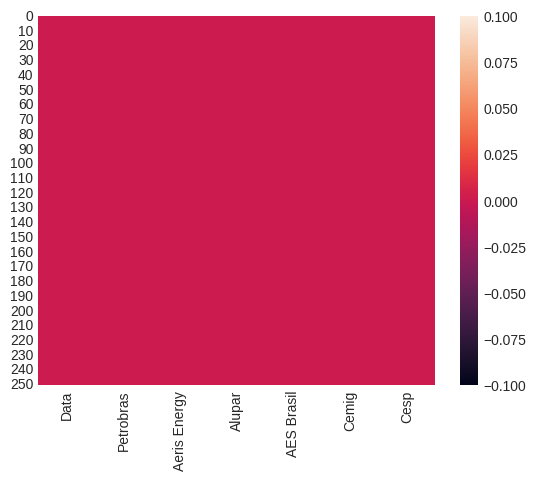

In [43]:
#Decidimos projectar um Heatmap para graficamente notarmos a incidência dos valores nulos
sns.heatmap(dados.isnull());

In [44]:
#Analisando cada Coluna do dataset:

In [45]:
for column in dados.columns:
    print(f"{column}: Number of unique values {dados[column].nunique()}")
    print("==========================================================")

Data: Number of unique values 250
Petrobras: Number of unique values 227
Aeris Energy: Number of unique values 173
Alupar: Number of unique values 182
AES Brasil: Number of unique values 204
Cemig: Number of unique values 169
Cesp: Number of unique values 187


## Anlise Gráfica dos Dados Energéticos

In [46]:
#Observação dos valores da Petrobras.

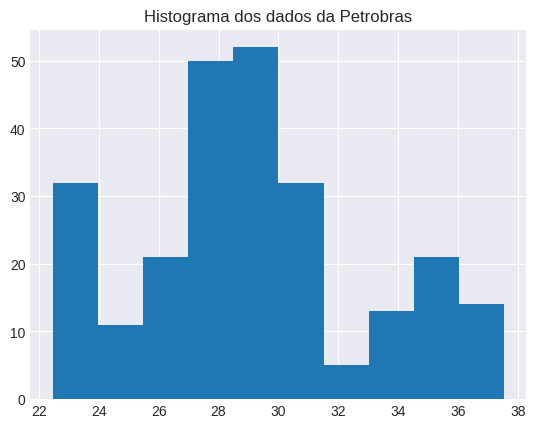

In [47]:

plt.hist(dados.Petrobras)
plt.title("Histograma dos dados da Petrobras");

In [48]:
dados['Petrobras'].mean()

29.131394412888

In [49]:
pet_dados = dados['Petrobras'].describe()

In [50]:
pet_dados

count    251.000000
mean      29.131394
std        3.796861
min       22.480000
25%       26.924999
50%       28.840000
75%       30.875000
max       37.520000
Name: Petrobras, dtype: float64

In [51]:
#Inserindo uma Serie Temporal

In [52]:
dados.set_index('Data', inplace=True)

In [53]:
dados

,Petrobras,Aeris Energy,Alupar,AES Brasil,Cemig,Cesp
Data,,,,,,
2021-03-22,23.080000,9.28,24.600000,31.100000,11.040665,27.980000
2021-03-23,22.549999,8.94,24.910000,30.750000,11.040665,27.700001
2021-03-24,22.530001,9.02,24.610001,30.000000,10.816444,27.330000
2021-03-25,22.959999,9.20,24.990000,30.770000,11.157260,27.809999
2021-03-26,23.299999,9.10,25.299999,30.270000,11.148292,28.090000
...,...,...,...,...,...,...
2022-03-17,32.869999,5.42,26.469999,31.750000,13.540000,22.969999
2022-03-18,33.160000,5.72,26.559999,32.230000,13.990000,23.510000
2022-03-21,34.270000,5.71,26.730000,32.520000,14.270000,23.600000


<ipython-input-54-abfc2865ba31>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


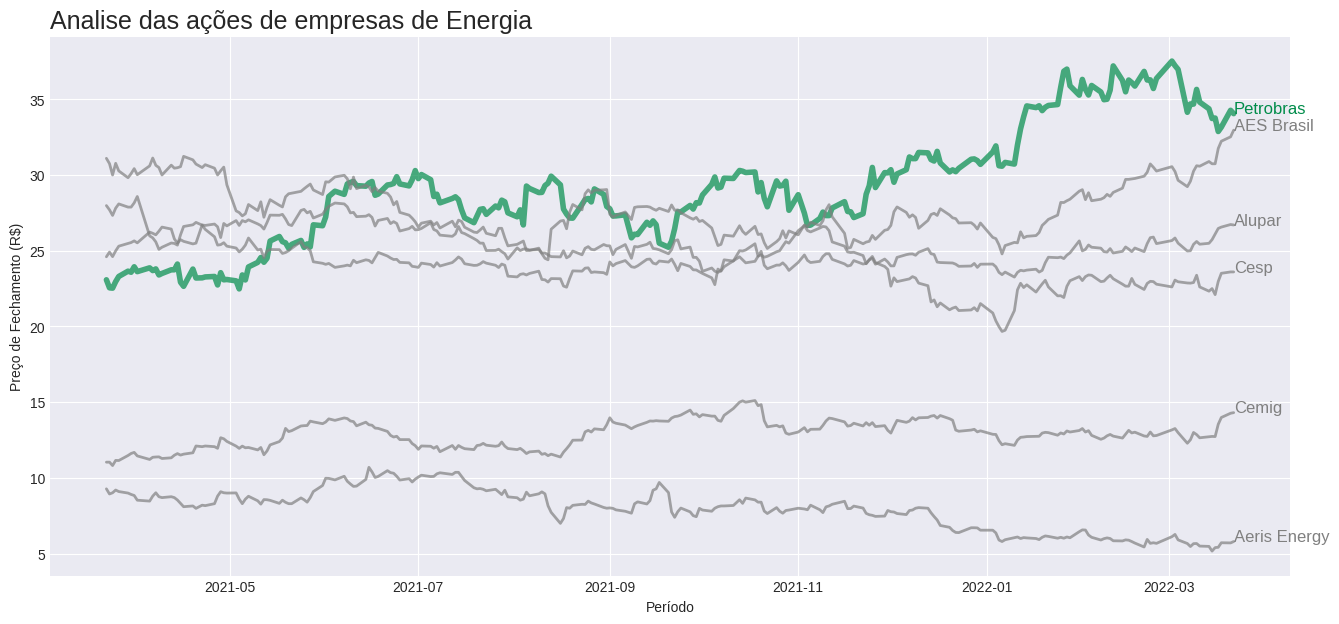

In [54]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(16, 7))

plt.title('Analise das ações de empresas de Energia', loc='left', fontsize=18, fontweight=0)

plt.plot(dados.index, dados['Petrobras'], color='#008c4a', linewidth=4, alpha=0.7)

plt.text( dados.index[-1], dados['Petrobras'].tail(1), 'Petrobras', color='#008c4a', size='large', horizontalalignment='left' )


for Coluna in dados.columns[1:]:

  plt.plot( dados.index, dados[Coluna], color='gray', linewidth=2, alpha=0.7 )

  plt.text( dados.index[-1], dados[Coluna].tail(1), Coluna, color='gray', size='large', horizontalalignment='left' )

# Labels
plt.xlabel('Período')
plt.ylabel('Preço de Fechamento (R$)');

<ipython-input-55-19bf3b3cb0de>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Petrobras', y='AES Brasil', data=dados, palette="vlag")


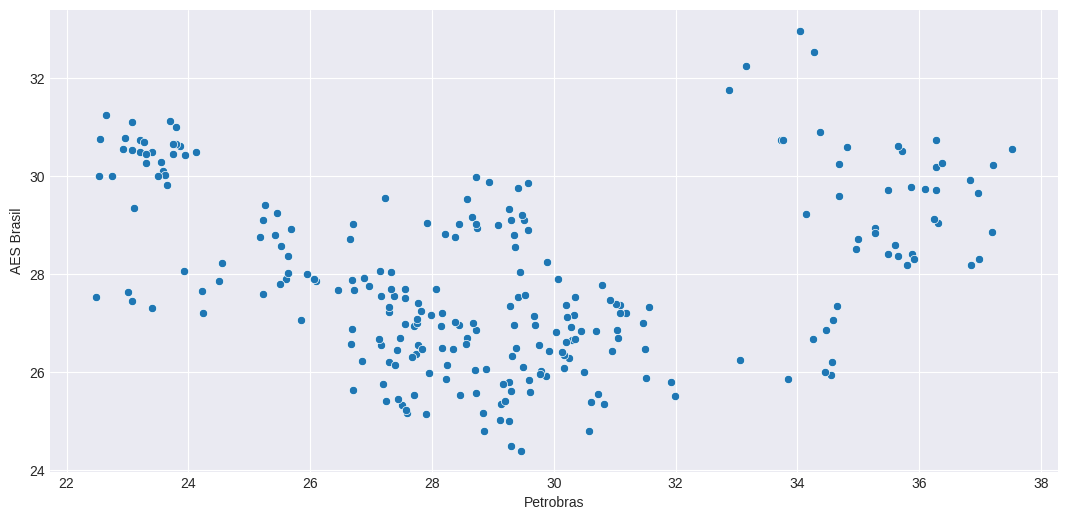

In [55]:
#Olhando as variaveis com o gráfico
plt.figure(figsize=(13,6))
sns.scatterplot(x='Petrobras', y='AES Brasil', data=dados, palette="vlag")
plt.show();

In [56]:
aes_dados = dados['AES Brasil'].describe().T
aes_dados

count    251.000000
mean      27.900797
std        1.801096
min       24.400000
25%       26.500000
50%       27.570000
75%       29.190000
max       32.959999
Name: AES Brasil, dtype: float64

In [57]:
dados['Cesp'].describe()

count    251.000000
mean      24.005339
std        1.518073
min       19.670000
25%       23.070000
50%       24.000000
75%       24.879999
max       28.580000
Name: Cesp, dtype: float64

<ipython-input-58-23507c77ce1e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Petrobras', y='Cesp', data=dados, palette="vlag")


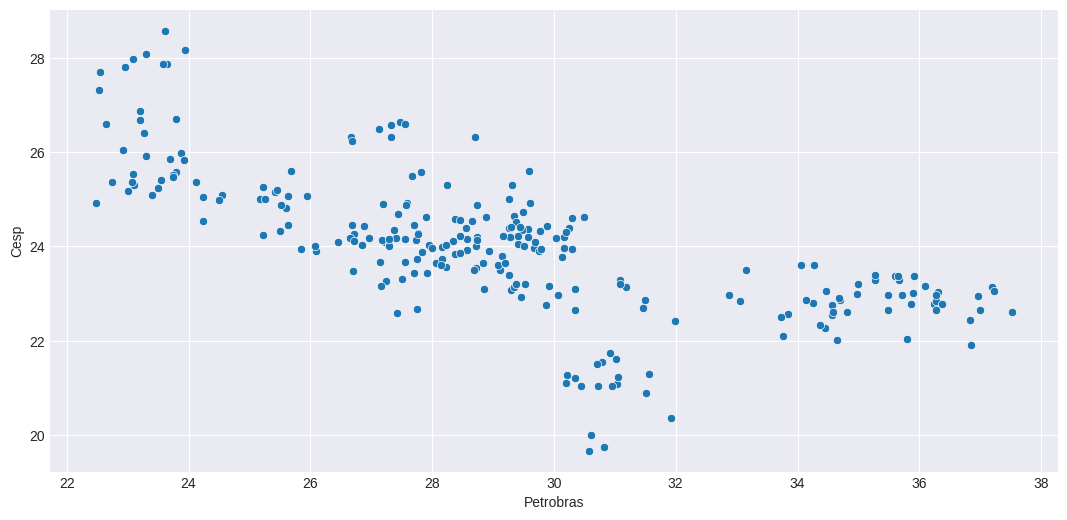

In [58]:
#Olhando as variaveis com o gráfico
plt.figure(figsize=(13,6))
sns.scatterplot(x='Petrobras', y='Cesp', data=dados, palette="vlag")
plt.show();

In [59]:
#Comparação da Petrobras com AES Brasil

<ipython-input-60-c1019f54e555>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=dados, y='Petrobras', width=0.35, palette='husl' );


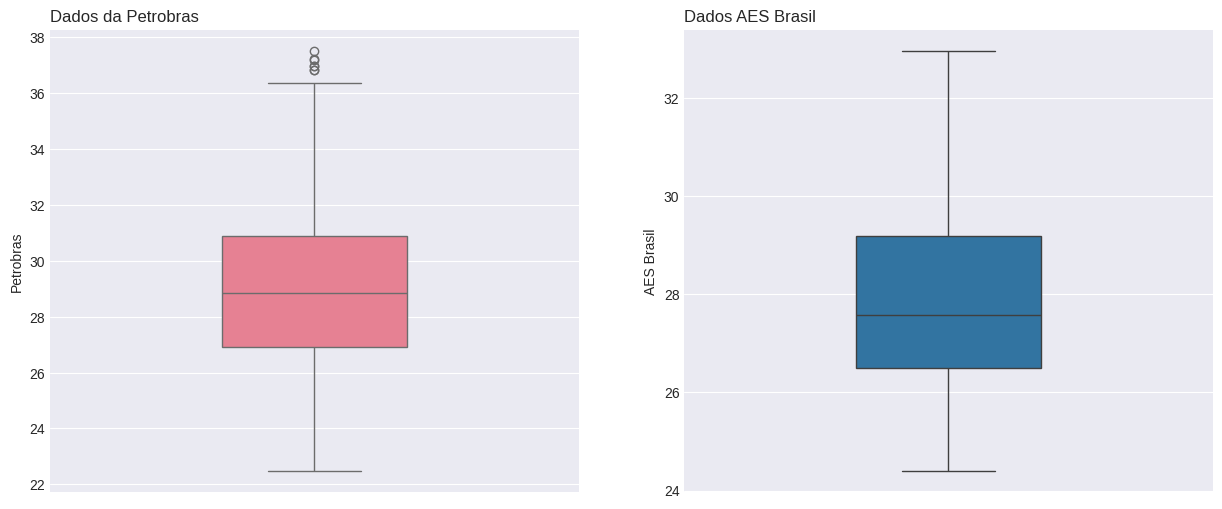

In [60]:
# Tamanho da imagem
plt.figure( figsize=(15, 6) )

# Grid 1
plt.subplot(1, 2, 1)
# Titulo do grafico
plt.title('Dados da Petrobras ', loc='left')
# Plot com os parametros
sns.boxplot( data=dados, y='Petrobras', width=0.35, palette='husl' );

# Grid 2
plt.subplot(1, 2, 2)
# Titulo do grafico
plt.title('Dados AES Brasil', loc='left')
# Plot com os parametros
sns.boxplot( data=dados, y='AES Brasil', width=0.35 );

In [61]:
#Comparação da Petrobras com Cesp

<ipython-input-62-1192a9ecfa04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=dados, y='Petrobras', width=0.35, palette='husl' );


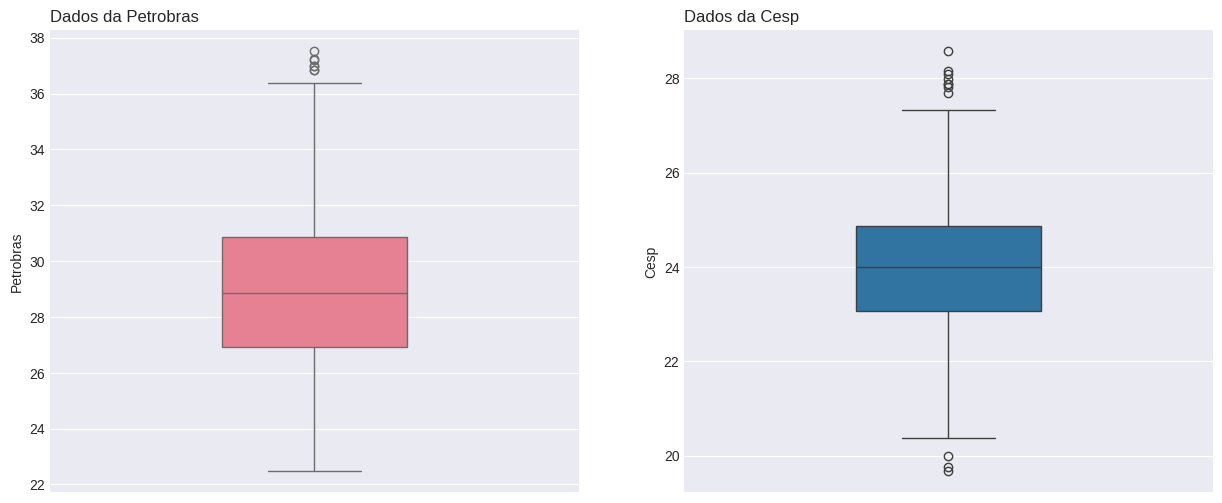

In [62]:
# Tamanho da imagem
plt.figure( figsize=(15, 6) )

# Grid 1
plt.subplot(1, 2, 1)
# Titulo do grafico
plt.title('Dados da Petrobras ', loc='left')
# Plot com os parametros
sns.boxplot( data=dados, y='Petrobras', width=0.35, palette='husl' );

# Grid 2
plt.subplot(1, 2, 2)
# Titulo do grafico
plt.title('Dados da Cesp', loc='left')
# Plot com os parametros
sns.boxplot( data=dados, y='Cesp', width=0.35 );

In [ ]:
#Correlação dos existente no dataset.

In [63]:
dados.corr()

,Petrobras,Aeris Energy,Alupar,AES Brasil,Cemig,Cesp
Petrobras,1.000000,-0.684937,-0.294659,-0.012029,0.317560,-0.693354
Aeris Energy,-0.684937,1.000000,0.490493,-0.122491,-0.177167,0.545601
Alupar,-0.294659,0.490493,1.000000,0.556508,-0.130542,0.354486
AES Brasil,-0.012029,-0.122491,0.556508,1.000000,-0.111303,0.289311
Cemig,0.317560,-0.177167,-0.130542,-0.111303,1.000000,-0.252070
Cesp,-0.693354,0.545601,0.354486,0.289311,-0.252070,1.000000
